<a href="https://colab.research.google.com/github/tranhuuan170302/demoCV/blob/main/demoPredictCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from textblob import TextBlob
from sklearn.tree import DecisionTreeClassifier
sns.set()

# Read file csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/topDev/data.csv')






## Xem dữ liệu tổng quan

In [ ]:
# xem thông tin dữ liệu bao gồm cột, số lượng dòng dữ liệu của các cột, kiểu dữ của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2029 non-null   int64 
 1   title               2029 non-null   object
 2   skill               2029 non-null   object
 3   address             2028 non-null   object
 4   skillAndExperience  1989 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.4+ KB


In [ ]:
# xe cấu trúc của dữ liệu và các giá trị của dữ liệu
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience
0,0,ASP.NET Developer (C# .NET/SQL Server),"[\n.NET\n\n, \nSQL\n\n, \nASP.NET\n\n]","\n153 Ung Van Khiem, Ward 25, Binh Thanh Distr...","\n\nWorking with young, healthy, ambitious and..."
1,1,Mid/Senior .NET Dev - $2800 (+Bonus),"[\n.NET\n\n, \nSQL\n\n, \nEnglish\n\n]","\n2 Nguyen The Loc, Ward 12, Tan Binh, Ho Chi ...",\nCompetitive Salary and Brilliant Health Bene...
2,2,"Fulltime/Freelancer - Backend Dev (C#, .NET, N...","[\nC#\n\n, \nNodeJS\n\n, \n.NET\n\n]","\nTầng 2, Indochina Riverside - 74 Bạch Đằng, ...","\nNgày nghỉ:Nghỉ lễ, nghỉ phép, nghỉ việc riên..."
3,3,".Net Developer (.NETCore, C#)","[\n.NET\n\n, \nC#\n\n, \nNodeJS\n\n]","\nLotte Tower, 54 Lieu Giai, Ba Dinh, Ha Noi\n...",\nPanasonic R&D Center Vietnam was established...
4,4,"Sign in bonus - C#, .NET, Angular Dev -Upto 2000$","[\nC#\n\n, \n.NET\n\n, \nAngular\n\n]","\nHoa Binh Tower, 106 Hoang Quoc Viet, Nghia D...",\nThu nhập cạnh tranh và nhiều cơ hội phát tri...


In [ ]:
# số lượng dữ liệu bị khuyết thiếu ở các cột
df.isna().sum()

Unnamed: 0             0
title                  0
skill                  0
address                1
skillAndExperience    40
dtype: int64

### Xóa hết tất cả các dữ liệu bị khuyết thiếu

In [ ]:
df.dropna(inplace = True)

# Clean data

In [ ]:
df['title'] = df['title'].str.lower()
df['skill'] = df['skill'].str.lower()
df['address'] = df['address'].str.lower()
df['skillAndExperience'] = df['skillAndExperience'].str.lower()

In [ ]:
df['title1'] = df['title']

In [ ]:
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1
0,0,asp.net developer (c# .net/sql server),"[\n.net\n\n, \nsql\n\n, \nasp.net\n\n]","\n153 ung van khiem, ward 25, binh thanh distr...","\n\nworking with young, healthy, ambitious and...",asp.net developer (c# .net/sql server)
1,1,mid/senior .net dev - $2800 (+bonus),"[\n.net\n\n, \nsql\n\n, \nenglish\n\n]","\n2 nguyen the loc, ward 12, tan binh, ho chi ...",\ncompetitive salary and brilliant health bene...,mid/senior .net dev - $2800 (+bonus)
2,2,"fulltime/freelancer - backend dev (c#, .net, n...","[\nc#\n\n, \nnodejs\n\n, \n.net\n\n]","\ntầng 2, indochina riverside - 74 bạch đằng, ...","\nngày nghỉ:nghỉ lễ, nghỉ phép, nghỉ việc riên...","fulltime/freelancer - backend dev (c#, .net, n..."
3,3,".net developer (.netcore, c#)","[\n.net\n\n, \nc#\n\n, \nnodejs\n\n]","\nlotte tower, 54 lieu giai, ba dinh, ha noi\n...",\npanasonic r&d center vietnam was established...,".net developer (.netcore, c#)"
4,4,"sign in bonus - c#, .net, angular dev -upto 2000$","[\nc#\n\n, \n.net\n\n, \nangular\n\n]","\nhoa binh tower, 106 hoang quoc viet, nghia d...",\nthu nhập cạnh tranh và nhiều cơ hội phát tri...,"sign in bonus - c#, .net, angular dev -upto 2000$"


In [ ]:
# xóa hết tất cả có kí tự số trong cột title
df['title'] = df['title'].str.replace('\d+',' ')
# xóa hết các kí tự đặc biệt trong cột title
df['title'] = df['title'].str.replace(r'[(,),$+]',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df['title'].unique()

array(['asp.net developer  c# .net/sql server ',
       'mid/senior .net dev -      bonus ',
       'fulltime/freelancer - backend dev  c#  .net  nodejs ',
       '.net developer  .netcore  c# ',
       'sign in bonus - c#  .net  angular dev -upto   ',
       '  .net dev  c#  angular  up to   ',
       'mid/sr .net dev  asp.net/ javascript ',
       'urgent - .net web dev  asp.net  c# ',
       'middle/ senior developer  java/ .net ',
       '  backend dev  .net  asp.net  c# ',
       '  full-stack .net developer ~   ', '.net developer  c#  asp.net ',
       '.net developer   javascript  html ~  ',
       '[remote] software dev  asp.net  .  or above  .net  c# ',
       'fullstack developer  .net  c#  reactjs ',
       '  senior .net full stack developer',
       '[all levels] backend developer  .net/golang ',
       'senior c# developer  .net/oop/win/azure ',
       'full stack dev  .net core c# /react/eng ',
       '.net/java/nodejs backend developer ~ m',
       'fullstack developer 

In [ ]:
df['title'] = df['title'].str.replace('dev ', 'developer ')
df['title'] = df['title'].str.replace('dev$', 'developer')
df['title'] = df['title'].str.replace('devs ', 'developer ')
df['title'] = df['title'].str.replace('system ', 'systems ')
df['title'] = df['title'].str.replace('test ', 'tester')
df['title'] = df['title'].str.replace('architecture', 'architect ')
df['title'] = df['title'].str.replace('design', 'designer ')
df['title'] = df['title'].str.replace('games ', 'game ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# tạo một list chứa các danh sách các nghề trong it
listJob = ['Computer Programmer', 'product',
'Database Administrator',
'Web Developer', 'tester',
'Information security','Computer security','Computer network','Systems','Data science','Network administrator','systems analyst','Technical Support',
'Information technology management','Engineer','Network Engineer','Technician','Manager','python',
'Network and Computer Systems Administrators','Business intelligence','Software engineering', 'scrum master',
'Computer hardware engineer','Computer Support Specialists','it service management','business analysis','security',
'Data analysis','Network architecture','Data Scientist','mobile developer','kỹ sư cầu nối', 'designer', 'services',
'Data Analyst','Computer scientist','Director','Software Architect','Webmaster','Cloud computing', 'application', 'devops', 
'Computer repair technician','Management information system','Computer and Information Research Scientists','Video game design','IT Consultant','Architecture','Web design','game developer','Computing',
'Business Analyst','User experience design','Information systems technicial','Frontend','Java',
'Software', 'Computer forensics', 'Computer and Information Systems Managers','Web development', 'architect', 'Product Management', 'ios developer', 'mobile', 'net developer', 'backend', 'developer']

In [ ]:
def getType(string):
  result = None
  for job in listJob:
    job = job.lower()
   
    index = string.find(job) 
    
    if index >= 0:
      result = job
      break
  return result

In [ ]:
df['types'] = df['title'].apply(lambda string: getType(string))

In [ ]:
df['types'].unique()

array(['net developer', 'backend', 'developer', 'java', 'web developer',
       'software', 'python', 'application', 'mobile developer', 'mobile',
       'game developer', 'ios developer', 'frontend', 'engineer',
       'kỹ sư cầu nối', 'business analyst', 'systems', 'product',
       'data analyst', 'business intelligence', 'manager', 'tester',
       'software architect', 'it service management', 'business analysis',
       'services', None, 'scrum master', 'technical support', 'designer',
       'devops', 'data scientist', 'security', 'architect', 'director',
       'information security'], dtype=object)

In [ ]:
df['types'].value_counts()

java                     484
developer                223
frontend                 150
python                   146
tester                   142
engineer                 142
backend                  103
web developer             97
business analyst          82
product                   79
manager                   60
net developer             49
mobile developer          40
systems                   28
mobile                    26
designer                  14
software                  14
ios developer             11
software architect        11
scrum master               9
game developer             9
architect                  7
services                   7
security                   6
application                5
technical support          4
it service management      4
data analyst               4
devops                     3
kỹ sư cầu nối              3
information security       3
business intelligence      2
director                   2
business analysis          1
data scientist

In [ ]:
len(df['types'].unique())

36

In [ ]:
df.dropna(inplace = True)

#### chia cắt các skil trong cột skill.

In [ ]:
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1,types
0,0,asp.net developer c# .net/sql server,"[\n.net\n\n, \nsql\n\n, \nasp.net\n\n]","\n153 ung van khiem, ward 25, binh thanh distr...","\n\nworking with young, healthy, ambitious and...",asp.net developer (c# .net/sql server),net developer
1,1,mid/senior .net developer - bonus,"[\n.net\n\n, \nsql\n\n, \nenglish\n\n]","\n2 nguyen the loc, ward 12, tan binh, ho chi ...",\ncompetitive salary and brilliant health bene...,mid/senior .net dev - $2800 (+bonus),net developer
2,2,fulltime/freelancer - backend developer c# ....,"[\nc#\n\n, \nnodejs\n\n, \n.net\n\n]","\ntầng 2, indochina riverside - 74 bạch đằng, ...","\nngày nghỉ:nghỉ lễ, nghỉ phép, nghỉ việc riên...","fulltime/freelancer - backend dev (c#, .net, n...",backend
3,3,.net developer .netcore c#,"[\n.net\n\n, \nc#\n\n, \nnodejs\n\n]","\nlotte tower, 54 lieu giai, ba dinh, ha noi\n...",\npanasonic r&d center vietnam was established...,".net developer (.netcore, c#)",net developer
4,4,sign in bonus - c# .net angular developer -u...,"[\nc#\n\n, \n.net\n\n, \nangular\n\n]","\nhoa binh tower, 106 hoang quoc viet, nghia d...",\nthu nhập cạnh tranh và nhiều cơ hội phát tri...,"sign in bonus - c#, .net, angular dev -upto 2000$",developer


In [ ]:
# hàm dùng để xóa các kí tự đặc biệt như \n, [,], .....
def removeCharacter(ColName, character, dataFrame):
  return dataFrame[ColName].str.replace(character, '')

In [ ]:
df['skill'] = removeCharacter('skill', '\n', df)
df['skill'] = removeCharacter('skill', '[', df)
df['skill'] = removeCharacter('skill', ']', df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataSkill = df[['Unnamed: 0', 'skill']]

In [ ]:
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(dataSkill.set_index('Unnamed: 0').skill.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

In [ ]:
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'skill_cut'}, inplace = True)

In [ ]:
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(skill, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [ ]:
# xem data mẫu
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1,types,skill_cut
0,0,asp.net developer c# .net/sql server,".net, sql, asp.net","\n153 ung van khiem, ward 25, binh thanh distr...","\n\nworking with young, healthy, ambitious and...",asp.net developer (c# .net/sql server),net developer,.net
1,0,asp.net developer c# .net/sql server,".net, sql, asp.net","\n153 ung van khiem, ward 25, binh thanh distr...","\n\nworking with young, healthy, ambitious and...",asp.net developer (c# .net/sql server),net developer,sql
2,0,asp.net developer c# .net/sql server,".net, sql, asp.net","\n153 ung van khiem, ward 25, binh thanh distr...","\n\nworking with young, healthy, ambitious and...",asp.net developer (c# .net/sql server),net developer,asp.net
3,1,mid/senior .net developer - bonus,".net, sql, english","\n2 nguyen the loc, ward 12, tan binh, ho chi ...",\ncompetitive salary and brilliant health bene...,mid/senior .net dev - $2800 (+bonus),net developer,.net
4,1,mid/senior .net developer - bonus,".net, sql, english","\n2 nguyen the loc, ward 12, tan binh, ho chi ...",\ncompetitive salary and brilliant health bene...,mid/senior .net dev - $2800 (+bonus),net developer,sql


In [ ]:
# xem thông tin data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 0 to 5945
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5946 non-null   int64 
 1   title               5946 non-null   object
 2   skill               5946 non-null   object
 3   address             5946 non-null   object
 4   skillAndExperience  5946 non-null   object
 5   title1              5946 non-null   object
 6   types               5946 non-null   object
 7   skill_cut           5946 non-null   object
dtypes: int64(1), object(7)
memory usage: 418.1+ KB


In [ ]:
df['skill_cut'].unique()

array(['.net', 'sql', 'asp.net', 'english', 'c#', 'nodejs', 'angular',
       'javascript', 'fresher accepted', 'java', 'reactjs', 'html5',
       'golang', 'oop', 'mysql', 'oracle', 'c language', 'mvc', 'python',
       'php', 'database', 'c++', 'erp', 'react native', 'angularjs',
       'flutter', 'android', 'ios', 'swift', 'unity', 'games', 'kotlin',
       'json', 'aws', 'agile', 'software architect', 'spring',
       'typescript', 'postgresql', 'nosql', 'laravel', 'system engineer',
       'django', 'devops', 'ruby', 'scala', 'blockchain', 'j2ee',
       'ruby on rails', 'sharepoint', 'wordpress', 'css', 'manager',
       'jquery', 'bridge engineer', 'japanese', 'project manager',
       'business analyst', 'system admin', 'qa qc', 'tester',
       'product manager', 'scrum', 'data analyst', 'ui-ux', 'team leader',
       'it support', 'embedded', 'linux', 'vuejs', 'magento',
       'networking', 'cloud', 'objective c', 'designer'], dtype=object)

#### chia cắt và xử lí cột address

In [ ]:
df['address'] = removeCharacter('address', '\n', df)

In [ ]:
# hàm chia cắt để lấy thành phố
def cutAddressStringCity(string, num):
  try:
    lstArr = string.split(',')
    result = lstArr[len(lstArr)-num]
  except:
    result = string
  return result

In [ ]:
# cắt để lấy các thành phố
df['City'] = df['address'].apply(lambda st: cutAddressStringCity(st, 1))
# Cắt để lấy tên các quận
df['District'] = df['address'].apply(lambda st: cutAddressStringCity(st, 2))

In [ ]:
# xem các giá trị unique của thành phố
df['City'].unique()

array([' ho chi minhsee map', ' da nangsee map', ' ha noisee map',
       ' nha trangsee map', 'work from homesee map', 'remotesee map',
       'ho chi minhsee map'], dtype=object)

In [ ]:
# xóa các từ không cần thiết trong cột City
df['City'] = df['City'].str.replace('see map', '')

In [ ]:
# xem các giá trị unique của quận
df['District'].unique()

array([' binh thanh', ' tan binh', ' hai chau', ' ba dinh', ' cau giay',
       ' hoang mai', ' dong da', ' district 7', ' district 4',
       ' district 3', ' district 1', ' hai ba trung', ' district 11',
       ' hoan kiem', ' phu nhuan', ' phuoc hai ward', ' district 5',
       ' other', ' district 10', ' thu duc city', ' tay ho',
       ' district 12', ' go vap', ' thanh xuan', ' district 9',
       ' ha dong', ' son tra', ' district 2', ' nam tu liem',
       ' bac tu liem', ' district 8', ' thu duc', 'district 1',
       ' tan phu', ' thanh khe', 'work from homesee map', ' cam le',
       'remotesee map', ' district 6', ' long bien', 'ho chi minhsee map',
       '.', 'remote', 'ha noi', ' lien chieu'], dtype=object)

In [ ]:
# Xóa các từ không cần thiết trong cột District
df['District'] = df['District'].str.replace('see map', '')

#### chọn các level trong từng giá trị từ title 

In [ ]:
lstStringLevel = ['fres', 'jun', 'sr', 'rem', 'mid', 'sen', 'all lev']

In [ ]:
def replaceStringTitleLevel(string):
    result = 'not experience'
    string = string.lower()
    for i in lstStringLevel:
        x = i+'\S+'
        sts = re.findall(x, string)
        if len(sts) >=1:
          result = sts[0]   
    return result

In [ ]:
df['experience'] = df['title'].apply(lambda st: replaceStringTitleLevel(st))

In [ ]:
df['experience'].value_counts()

not experience       4372
senior                941
junior                116
sr.                    70
all level              47
mid/sr                 45
middle                 44
remote                 35
all levels             25
all levels]            21
mid/sr.                21
all level-backend      20
remote]                19
all level]             16
fresh                  16
mid/                   15
senior/                14
senior/mid             12
sr/team                12
fresher                11
remote/                 9
remote-fullstack        9
senior/middle           9
senior]                 9
junior]                 8
sr/principal            6
sr/mid                  6
all level-              4
fresher/jr              4
fresher]                4
senior/lead             4
remote/hybrid           2
Name: experience, dtype: int64

In [ ]:
df['experience'] = df['experience'].str.replace(']', '')
df['experience'] = df['experience'].str.replace(')', '')
df['experience'] = df['experience'].str.replace(',', '')
df['experience'] = df['experience'].str.replace('.', '')
df['experience'] = df['experience'].str.replace('/$', '')
df['experience'] = df['experience'].str.replace('sr', 'senior')
df['experience'] = df['experience'].str.replace('levels', 'level')
df['experience'] = df['experience'].str.replace('fresh$', 'fresher')
df['experience'] = df['experience'].str.replace('mid$', 'middle')
df['experience'] = df['experience'].str.replace('mid/', 'middle/')
df['experience'] = df['experience'].str.replace('jr', 'junior')
df['experience'] = df['experience'].str.replace('lead$', 'leader')
df['experience'] = df['experience'].str.replace('-backend', '')
df['experience'] = df['experience'].str.replace('-3', '') 
df['experience'] = df['experience'].str.replace('-', '/') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex wil

In [ ]:
df['experience'].value_counts()

not experience      4372
senior              1034
all level            129
junior               124
middle/senior         66
remote                63
middle                59
fresher               31
senior/middle         27
senior/team           12
remote/fullstack       9
senior/principal       6
fresher/junior         4
all level/             4
senior/leader          4
remote/hybrid          2
Name: experience, dtype: int64

In [ ]:
df['experience'] = df['experience'].str.replace('/$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dfExperience = df[['Unnamed: 0', 'experience']].loc[df[['Unnamed: 0', 'experience']].duplicated() == True, :]

In [ ]:
dfExperience.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 1 to 5945
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3975 non-null   int64 
 1   experience  3975 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.2+ KB


In [ ]:
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
experience = pd.DataFrame(dfExperience.set_index('Unnamed: 0').experience.str.split('/', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

In [ ]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4061 non-null   int64 
 1   0           4061 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.6+ KB


In [ ]:
# đổi tên cột 0 trong dataFrame skill thành 'experienceSub'
experience.rename(columns = {0:'experienceSub'}, inplace = True)

In [ ]:
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(experience, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12612 entries, 0 to 12611
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12612 non-null  int64 
 1   title               12612 non-null  object
 2   skill               12612 non-null  object
 3   address             12612 non-null  object
 4   skillAndExperience  12612 non-null  object
 5   title1              12612 non-null  object
 6   types               12612 non-null  object
 7   skill_cut           12612 non-null  object
 8   City                12612 non-null  object
 9   District            12612 non-null  object
 10  experience          12612 non-null  object
 11  experienceSub       12612 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
df['experienceSub'].value_counts()

not experience    9070
senior            2256
junior             342
all level          330
middle             312
remote             140
fresher            102
team                24
fullstack           18
principal           12
leader               4
hybrid               2
Name: experienceSub, dtype: int64

# lấy data có giá trị

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12612 entries, 0 to 12611
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12612 non-null  int64 
 1   title               12612 non-null  object
 2   skill               12612 non-null  object
 3   address             12612 non-null  object
 4   skillAndExperience  12612 non-null  object
 5   title1              12612 non-null  object
 6   types               12612 non-null  object
 7   skill_cut           12612 non-null  object
 8   City                12612 non-null  object
 9   District            12612 non-null  object
 10  experience          12612 non-null  object
 11  experienceSub       12612 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
data = df[['types', 'skill_cut', 'City', 'District', 'experienceSub']]

# Thực hiện trực quan hóa dữ liệu.

In [ ]:
data['City'] =  data['City'].str.strip()
data['types'] =  data['types'].str.strip()
data['skill_cut'] =  data['skill_cut'].str.strip()
data['District'] =  data['District'].str.strip()
data['experienceSub'] =  data['experienceSub'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data['City'].value_counts()

ho chi minh       8082
ha noi            4118
da nang            320
nha trang           42
work from home      30
remote              20
Name: City, dtype: int64

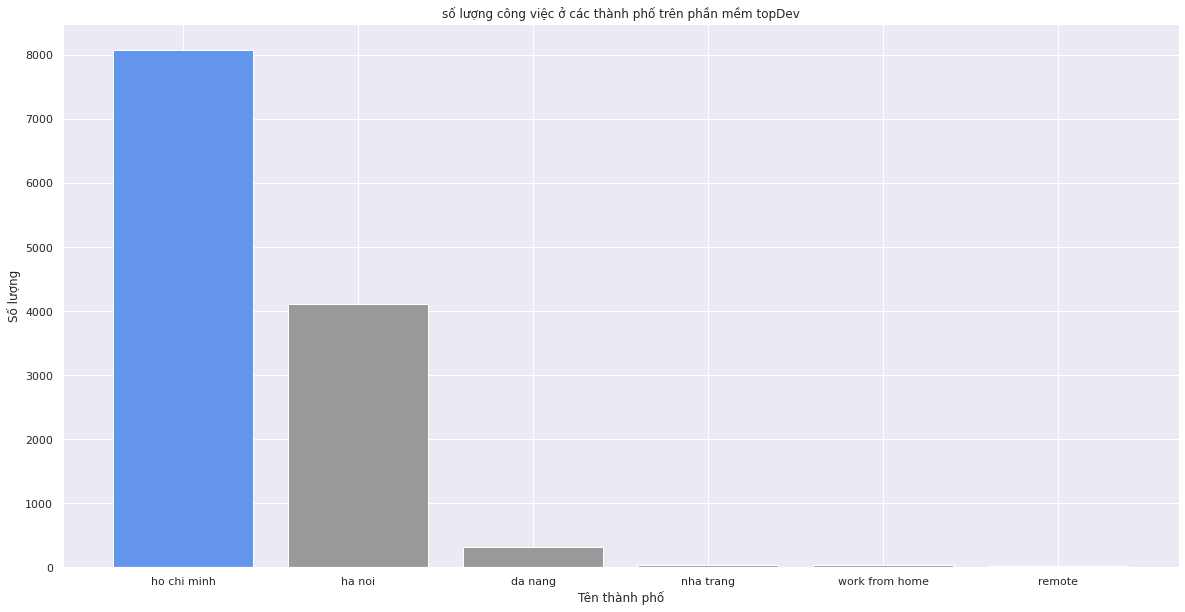

In [ ]:
my_colors = ['#6495ED','#999999', '#999999', '#999999', '#999999', '#999999']

fig = plt.figure(figsize = (20,10))
plt.bar(data['City'].value_counts().index, data['City'].value_counts().values, color=my_colors)
plt.title('số lượng công việc ở các thành phố trên phần mềm topDev')
plt.ylabel('Số lượng')
plt.xlabel('Tên thành phố')
plt.show()

#### trực quan hóa dữ liệu District

In [ ]:
data['District'].unique()

array(['binh thanh', 'tan binh', 'hai chau', 'ba dinh', 'cau giay',
       'hoang mai', 'dong da', 'district 7', 'district 4', 'district 3',
       'district 1', 'hai ba trung', 'district 11', 'hoan kiem',
       'phu nhuan', 'phuoc hai ward', 'district 5', 'other',
       'district 10', 'thu duc city', 'tay ho', 'district 12', 'go vap',
       'thanh xuan', 'district 9', 'ha dong', 'son tra', 'district 2',
       'nam tu liem', 'bac tu liem', 'district 8', 'thu duc', 'tan phu',
       'thanh khe', 'work from home', 'cam le', 'remote', 'district 6',
       'long bien', 'ho chi minh', '.', 'ha noi', 'lien chieu'],
      dtype=object)

In [ ]:
data.drop(index = data.loc[(data['District'] == 'ho chi minh') | (data['District'] == 'ha noi') | (data['District'] == '.'), :].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data['District'] = data['District'].str.replace('Thu Duc city', 'Thu Duc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ITHCM = data.loc[data['City'] == 'ho chi minh', :]

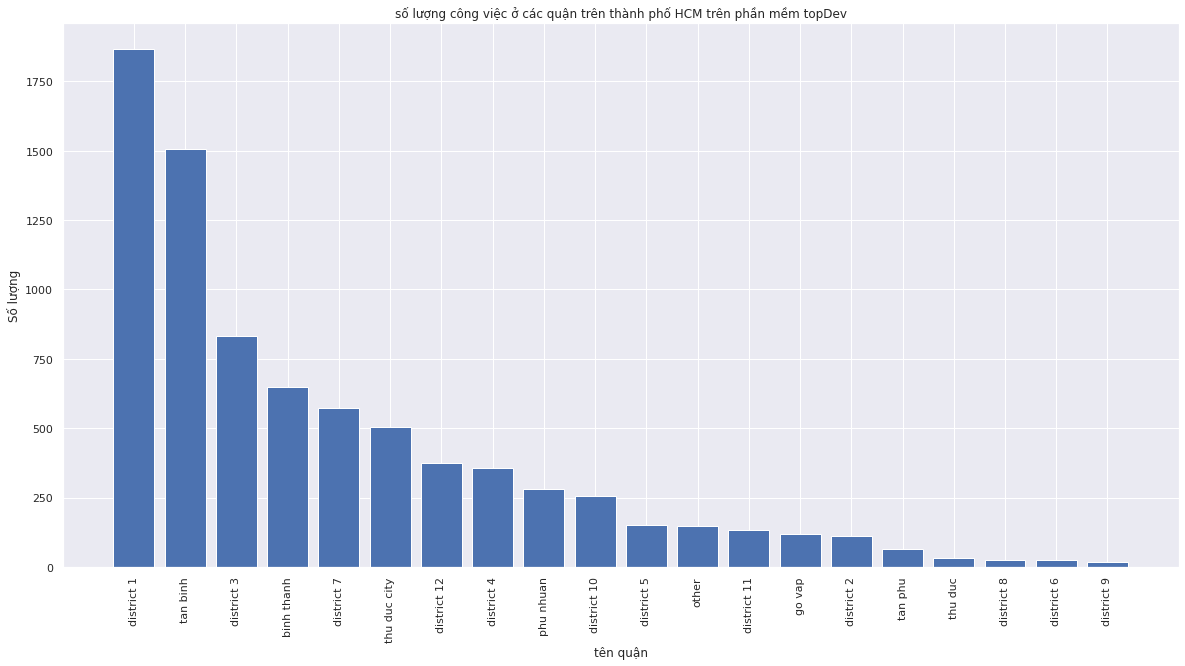

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['District'].value_counts().index, ITHCM['District'].value_counts().values)
plt.xticks(rotation=90)
plt.title('số lượng công việc ở các quận trên thành phố HCM trên phần mềm topDev')
plt.ylabel('Số lượng')
plt.xlabel('tên quận')
plt.show()

#### trực quan hóa kinh nghiệm trong experience

In [ ]:
data['experienceSub'].value_counts()

not experience    9058
senior            2250
junior             342
all level          330
middle             312
remote             140
fresher             54
team                24
fullstack           18
principal           12
leader               4
hybrid               2
Name: experienceSub, dtype: int64

In [ ]:
data.drop(index = data.loc[data['experienceSub'] == 'hybrid', :].index, inplace = True)

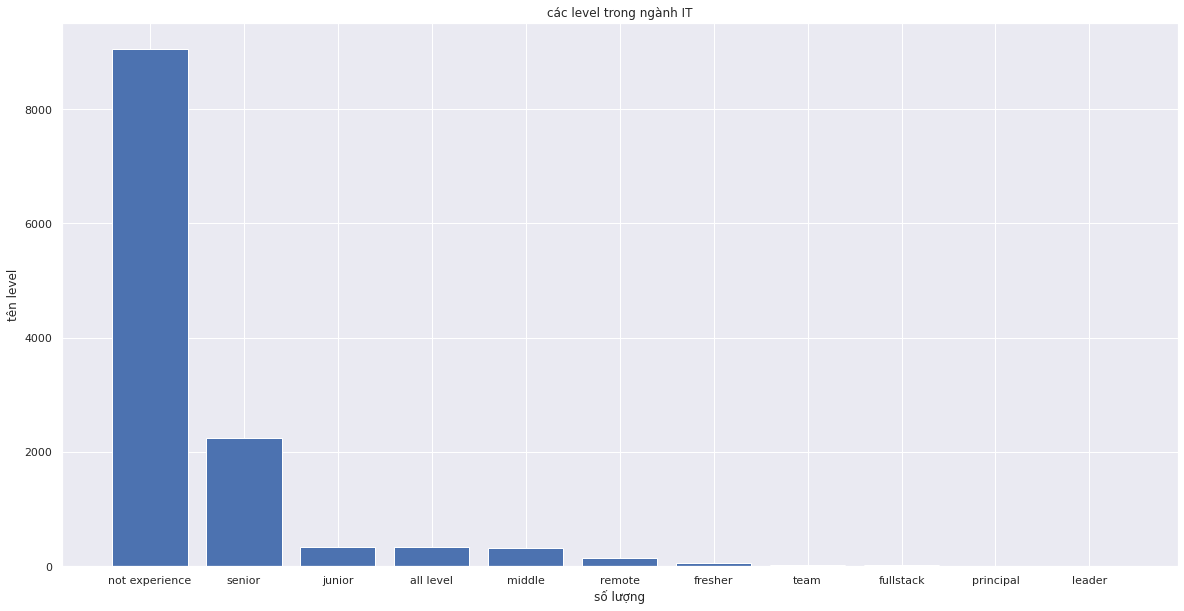

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(data['experienceSub'].value_counts().index, data['experienceSub'].value_counts().values)
plt.title('các level trong ngành IT')
plt.xlabel('số lượng')
plt.ylabel('tên level')
plt.show()

#### Trực quan hóa các kĩ năng

In [ ]:
ITHCM['skill_cut'].value_counts()

java                718
javascript          448
reactjs             430
nodejs              378
fresher accepted    330
                   ... 
objective c          10
sharepoint            8
json                  8
bridge engineer       8
jquery                4
Name: skill_cut, Length: 75, dtype: int64

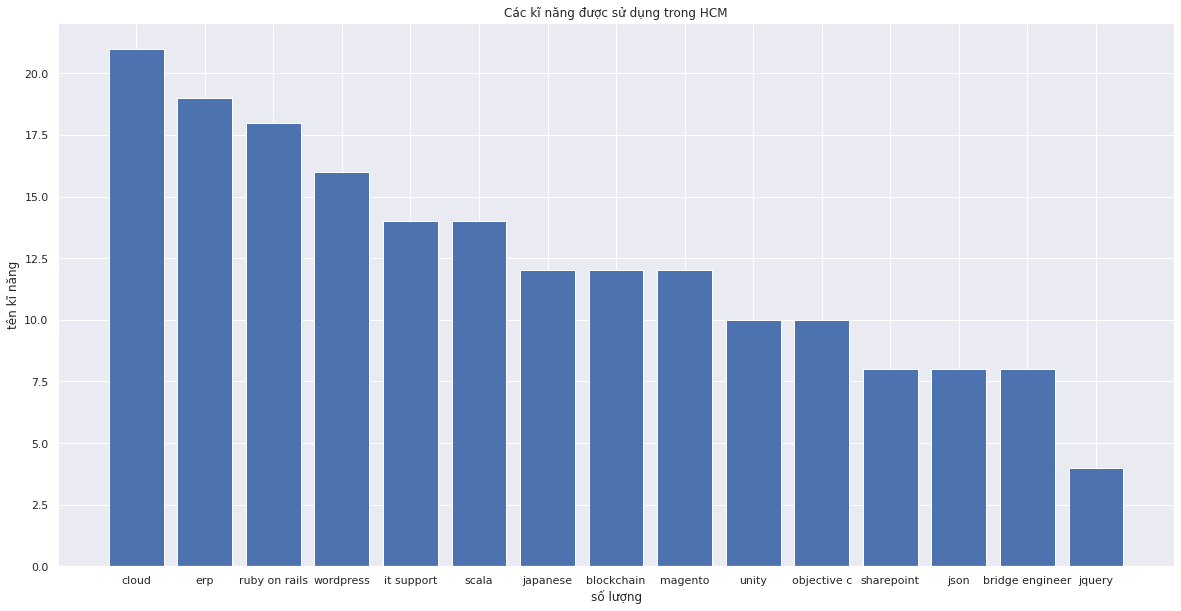

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['skill_cut'].value_counts().index[60:], ITHCM['skill_cut'].value_counts().values[60:])
plt.title('Các kĩ năng được sử dụng trong HCM')
plt.ylabel('tên kĩ năng')
plt.xlabel('số lượng')
plt.show()

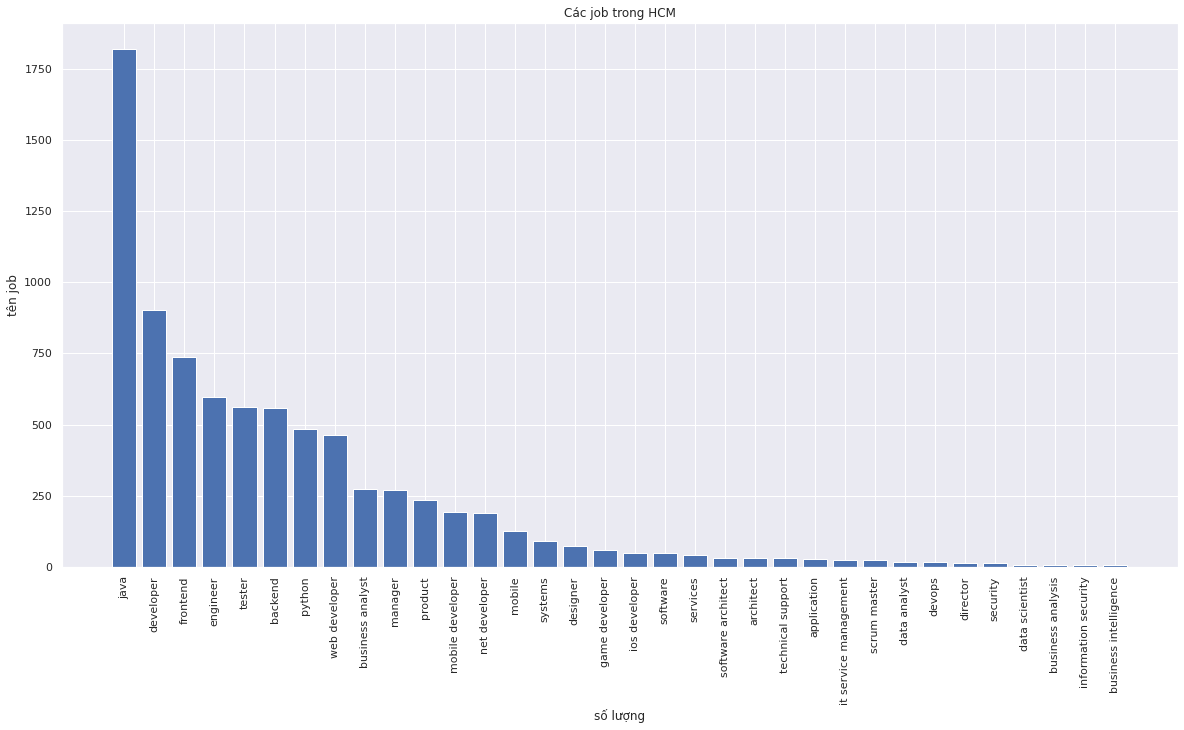

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['types'].value_counts().index, ITHCM['types'].value_counts().values)
plt.title('Các job trong HCM')
plt.ylabel('tên job')
plt.xlabel('số lượng')
plt.xticks(rotation=90)
plt.show()

# Thực hiện One-hot encoding

In [ ]:
dataTrain = data.copy()

In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12544 entries, 0 to 12611
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   types          12544 non-null  object
 1   skill_cut      12544 non-null  object
 2   City           12544 non-null  object
 3   District       12544 non-null  object
 4   experienceSub  12544 non-null  object
dtypes: object(5)
memory usage: 588.0+ KB


In [ ]:
dataTrain["types"] = dataTrain["types"].astype('category')
dataTrain["skill_cut"] = dataTrain["skill_cut"].astype('category')
dataTrain["City"] = dataTrain["City"].astype('category')
dataTrain["District"] = dataTrain["District"].astype('category')
dataTrain["experienceSub"] = dataTrain["experienceSub"].astype('category')

In [ ]:
dataTrain["types_codes"] = dataTrain["types"].cat.codes
dataTrain["skill_cut_codes"] = dataTrain["skill_cut"].cat.codes
dataTrain["City_codes"] = dataTrain["City"].cat.codes
dataTrain["District_codes"] = dataTrain["District"].cat.codes
dataTrain["experienceSub_codes"] = dataTrain["experienceSub"].cat.codes

In [ ]:
# xem các giá trị đã chuyển sang dạng code
def CodeData(name1, name2, dataTrain):
  return  dataTrain[[name1, name2]].loc[dataTrain[[name1, name2]].duplicated() == False, :]

In [ ]:
CodeData('types', 'types_codes', dataTrain).head(5)

,types,types_codes
0,net developer,23
12,backend,2
24,developer,9
36,java,18
48,web developer,34


# lấy các dữ liệu code

In [ ]:
dataTrain1 = dataTrain[['types_codes', 'skill_cut_codes', 'City_codes','District_codes', 'experienceSub_codes']]

In [ ]:
dataTrain1.head()

,types_codes,skill_cut_codes,City_codes,District_codes,experienceSub_codes
0,23,0,2,2,6
1,23,0,2,2,6
2,23,64,2,2,6
3,23,64,2,2,6
4,23,5,2,2,6


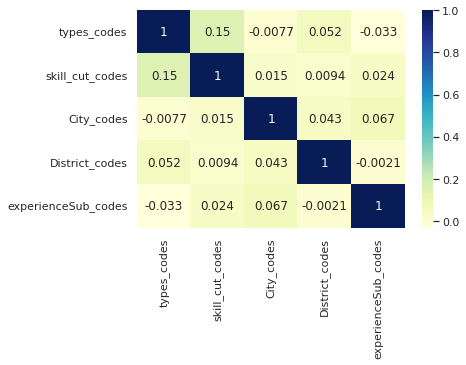

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(dataTrain1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Train and test split

In [ ]:
X = dataTrain1.drop('types_codes', axis = 1)
y = dataTrain1['types_codes']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(10035, 4) (2509, 4) (10035,) (2509,)


#### 1. Classification.

In [ ]:
# tạo obj để phân loại cây quyết định
clf = DecisionTreeClassifier()

# đào tạo lớp phân loại
clf = clf.fit(X_train,y_train)

#sử dụng bộ test để dự đoán
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
decision = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", decision)

Accuracy: 0.6982861697887605


### 2. logisticRegression.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLg = LogisticRegression()

modelLg.fit(X_train,y_train)

predLg = modelLg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lg =metrics.accuracy_score(y_test, predLg)
print("Accuracy:", lg)

Accuracy: 0.24591470705460342


### 3. Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
model_svm = svm.SVC()

model_svm.fit(X_train,y_train)

pred_svm = model_svm.predict(X_test)

In [ ]:
# Model Accuracy
svm = metrics.accuracy_score(y_test, pred_svm)
print("Accuracy:", svm)

Accuracy: 0.2510960542048625


### 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# xây dựng mô hình knn sử dụng tham số neighbor để lấy các điểm lân cận gần nhất
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.6771300448430493, 2: 0.6739412057797708, 3: 0.6857997010463378, 4: 0.6789237668161435, 5: 0.679920279023418, 6: 0.6704534130543099, 7: 0.6620827105132038, 8: 0.6511210762331838, 9: 0.6371699053313403, 10: 0.6321873442949676, 11: 0.6166417538614848, 12: 0.6034877927254609} 
 {1: 0.6396970904742926, 2: 0.625348744519729, 3: 0.6177760063770427, 4: 0.60263053009167, 5: 0.6006377042646472, 6: 0.5823037066560383, 7: 0.5667596652052611, 8: 0.5699481865284974, 9: 0.5552012754085293, 10: 0.5544041450777202, 11: 0.5392586687923475, 12: 0.5304902351534476}


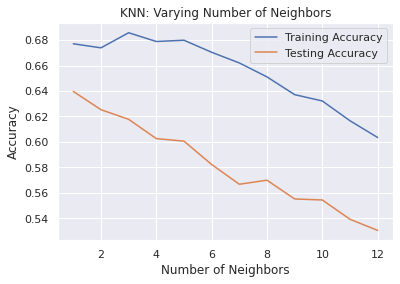

In [ ]:

plt.title("KNN: Varying Number of Neighbors")

# vẽ đường train accuracies
plt.plot(list(neighbors), list(train_accuracies.values()), label="Training Accuracy")

# vex đường test accuracies
plt.plot(list(neighbors), list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# hiển thị biểu đồ
plt.show()

Nhìn vào biểu đồ ta thấy ở number of neighbors = 3 có Accuracy tốt nhất. Vì vậy tham số truyền vào sẽ là 3

In [ ]:
# Set up a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

predKnn = knn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
knn = metrics.accuracy_score(y_test, predKnn)
print("Accuracy:",knn)

Accuracy: 0.6177760063770427


### 5. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
modelAnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
modelAnn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
predAnn = modelAnn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
ann = metrics.accuracy_score(y_test, predAnn)
print("Accuracy:",ann)

Accuracy: 0.2510960542048625


# Vẽ mô hình dự đoán

In [ ]:
valuePredict = [decision, lg, svm, knn, ann]
label = ['Decision Tree', 'Logistics regression', 'SVM', 'KNN', 'ANN']

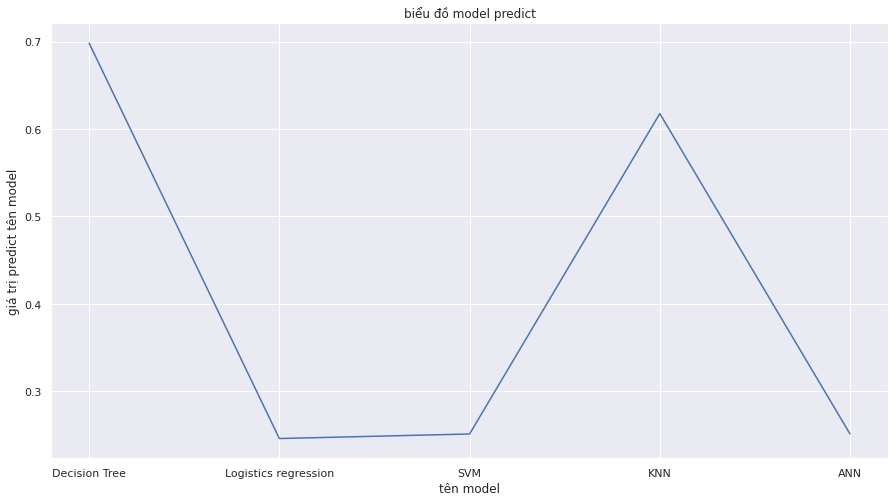

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.title("biểu đồ model predict")
sns.lineplot(x = label, y = valuePredict)
plt.ylabel("giá trị predict tên model")
plt.xlabel("tên model")
plt.show()

Dựa vào biểu đồ ta nhận thấy có Decision Tree có độ chính xác cao nhất